In [9]:
import pytesseract
from pdf2image import convert_from_path
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import time
import csv

In [2]:
pdf = "1587985805833.pdf"
pages = convert_from_path(pdf, 1)

i = 1
for page in pages:
    image_name = "Page_" + str(i) + ".jpg"  
    page.save(image_name, "JPEG")
    i += 1 

In [3]:
pages[0]

In [4]:
def mark_region(image_path):
    
    im = cv2.imread(image_path)

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x,y,w,h = cv2.boundingRect(c)

        if y >= 600 and x <= 1000:
            if area > 10000:
                image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
                line_items_coordinates.append([(x,y), (2200, y+h)])

        if y >= 2400 and x<= 2000:
            image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
            line_items_coordinates.append([(x,y), (2200, y+h)])

    return image, line_items_coordinates

In [ ]:
a, b = mark_region("./test_img_jpg.jpg")

In [ ]:
import numpy as np
b[0]

In [5]:

# load the original image
image = cv2.imread('test_img2.png')

# get coordinates to crop the image - test variable

#Pass coordinates as [(x, y), (x, y)]
#Where the first and second tuples are for the top left and bottom right coords respectively
def extract_plot(c, plot=False):
    # cropping image img = image[y0:y1, x0:x1]
    img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]    

    if plot:
        plt.figure(figsize=(10,10))
        plt.imshow(img)
        plt.savefig("cropped_image")

    # convert the image to black and white for better OCR
    ret, thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

    # pytesseract image to string to get results
    text = str(pytesseract.image_to_string(thresh1, config='--oem 3 -l eng+kan --psm 6'))
    #print(text)
    
    return text

ಅನಧಿಕೃತ ಮನೆಗಳು

ಕರಿ ವೀರಪ್ಪ ಮಲ್ಲಪ್ಪ ಚಿಂಚಲಿ
ಬಸಪ್ಪ ದೊಡ್ಡಬಸಪ್ಪ ಚಿಂಚಲಿ
ಶಿವಾನಂದಪ್ಪ ದೊಡ್ಡಬಸಪ್ಪ
ಚಿಂಚಲಿ

ವಿರುಪಾಕ್ಷಪ್ಪ ಪಂಪಾಪತೆಪ್ಪ
ಅನಧಿಕೃತ ಮನೆಗಳು

ಕರಿ ವೀರಪ್ಪ ಮಲ್ಲಪ್ಪ ಚಿಂಚಲಿ



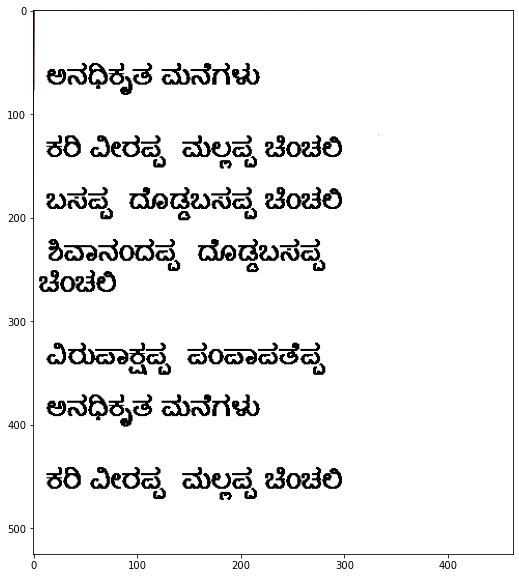

In [6]:
#Example coordinates
temp = [(359, 984), (822, 1509)]
temp2 = [(468, 83), (1716, 130)]
temp3 = [(1215, 202), (1607, 806)]
temp4 = [(1881, 205), (2156, 798)]

text = extract_plot(temp, plot=True)
print(text)

In [11]:
file = open("table_coords.csv")
csv_reader = csv.reader(file)

In [12]:
rows_list = [row[0].split('\t') for row in csv_reader]
rows_list

[['meta_1', '590', '80', '850', '123'],
 ['meta_2', '960', '80', '1411', '123'],
 ['meta_3', '1507', '80', '1908', '123'],
 ['meta_4', '1991', '64', '2595', '99'],
 ['meta_5', '1619', '1525', '2537', '1582'],
 ['table1', '210', '209', '340', '334'],
 ['table2', '328', '342', '552', '392'],
 ['table3', '567', '160', '743', '333'],
 ['table4', '973', '158', '1209', '393'],
 ['table5', '211', '471', '339', '606'],
 ['table6', '211', '660', '339', '804'],
 ['table7_1', '355', '515', '473', '800'],
 ['table7_2', '493', '515', '548', '800'],
 ['table8_1', '566', '514', '610', '800'],
 ['table8_2', '625', '516', '708', '802'],
 ['table8_3', '725', '516', '826', '801'],
 ['table8_4', '842', '514', '960', '802'],
 ['table8_5', '977', '517', '1069', '799'],
 ['table8_6', '1088', '517', '1204', '799'],
 ['table9_1', '1220', '190', '1607', '801'],
 ['table9_2', '1622', '193', '1753', '795'],
 ['table9_3', '1768', '192', '1863', '801'],
 ['table10', '1881', '192', '2159', '798'],
 ['table11_1', '21

In [13]:
def get_extracted_data(rows_list, display_updates=True): 
    extracted_data = []
    total_time = 0
    extracted = 0
    for coord_data in rows_list:
        name, x1, y1, x2, y2 = coord_data[0], int(coord_data[1]), int(coord_data[2]), int(coord_data[3]), int(coord_data[4])

        #Extract data
        start = time.time()
        text = extract_plot([(x1, y1), (x2, y2)])
        end = time.time()

        extracted += 1
        percentage = round((extracted/len(rows_list))*100, 2)
        total_time += (end-start)

        if display_updates: print("Extracted ",extracted,"; t=",round(end-start, 2),"s",";",percentage,"%")
        extracted_data.append(text)
    print("Total time taken: ",round(total_time, 2),"s")
    
    return extracted_data

In [14]:
data = get_extracted_data(rows_list)

Extracted  1 ; t= 0.25 s ; 2.44 %
Extracted  2 ; t= 0.22 s ; 4.88 %
Extracted  3 ; t= 0.23 s ; 7.32 %
Extracted  4 ; t= 0.23 s ; 9.76 %
Extracted  5 ; t= 0.19 s ; 12.2 %
Extracted  6 ; t= 0.17 s ; 14.63 %
Extracted  7 ; t= 0.16 s ; 17.07 %
Extracted  8 ; t= 0.17 s ; 19.51 %
Extracted  9 ; t= 0.19 s ; 21.95 %
Extracted  10 ; t= 0.15 s ; 24.39 %
Extracted  11 ; t= 0.15 s ; 26.83 %
Extracted  12 ; t= 0.16 s ; 29.27 %
Extracted  13 ; t= 0.14 s ; 31.71 %
Extracted  14 ; t= 0.14 s ; 34.15 %
Extracted  15 ; t= 0.14 s ; 36.59 %
Extracted  16 ; t= 0.14 s ; 39.02 %
Extracted  17 ; t= 0.14 s ; 41.46 %
Extracted  18 ; t= 0.14 s ; 43.9 %
Extracted  19 ; t= 0.14 s ; 46.34 %
Extracted  20 ; t= 0.23 s ; 48.78 %
Extracted  21 ; t= 0.16 s ; 51.22 %
Extracted  22 ; t= 0.16 s ; 53.66 %
Extracted  23 ; t= 0.28 s ; 56.1 %
Extracted  24 ; t= 0.14 s ; 58.54 %
Extracted  25 ; t= 0.14 s ; 60.98 %
Extracted  26 ; t= 0.17 s ; 63.41 %
Extracted  27 ; t= 0.27 s ; 65.85 %
Extracted  28 ; t= 0.14 s ; 68.29 %
Extracte

In [44]:
print(data)

['ಕಾರಟಗಿ\n', 'ಕಾರಟಗಿ NEN\n', 'ತಿಮ್ಮಾಪೂರ\n', 'Valid from 30/07/2019 18:29:00 To Till Date\n', 'RTC DIGITALLY SIGNED BY : Umesh ON 1/3/2020 4\n', ':\n', '೧\n', '0.23.00.00 —\n0.23.00.00\n', '186...\n0.00\n0.00\n0.00\n186\n', 'ಕಪ್ಪು\n', 'ಪಟ್ಟಾ\na\n', '', '', '', '', '', '', '', '', 'ಕರಿ ವೀರಪ್ಪ ತಂದೆ ಮಲ್ಲಪ್ಪ\n\n0ಚಲಿ\nಬಸಪ್ಪ ತಂದೆ ದೊಡ್ಡಬಸಪ್ಪ ಚಿಂಚಲಿ\nಶಿವಾನಂದಪ್ಪ ತಂದೆ ದೊಡ್ಡಬಸಪ್ಪ\nಚಿಂಚಲಿ\nವಿರುಪಾಕ್ಷಪ್ಪ ತಂದೆ ಪಂಪಾಪತೆಪ್ಪ\n', '007.000\n:\n\n0.04.00.0\n0.04.00.0\n0.08.00.0\n', '46\n212\n460\n3058\n', 'M.NO.86/27-2-2001\nವಿರಾಸತ\n\nM.NO.86/27-2-2001\nವಿರಾಸತ\n\nM.NO.86/27-2-2001\nವಿರಾಸತ\n\nMR H37/2018-2019\n30/07/2019 ಪೌತಿ\n', '', '', '2019-2020\nಮುಂಗಾರು\n2019-2020\nಹಿಂಗಾರು\n', 'ಅನಧಿಕೃತ ಮನೆಗಳು\n\nಕರಿ ವೀರಪ್ಪ ಮಲ್ಲಪ್ಪ ಚಿಂಚಲಿ\nಬಸಪ್ಪ ದೊಡ್ಡಬಸಪ್ಪ ಚಿಂಚಲಿ\nಶಿವಾನಂದಪ್ಪ ದೊಡ್ಡಬಸಪ್ಪ\nಚಿಂಚಲಿ\n\nವಿರುಪಾಕ್ಷಪ್ಪ ಪಂಪಾಪತೆಪ್ಪ\nಅನಧಿಕೃತ ಮನೆಗಳು\n\nಕರಿ ವೀರಪ್ಪ ಮಲ್ಲಪ್ಪ ಚಿಂಚಲಿ\n', '1\n1\n1\n1\n1\n1\n1\n', '0.00.00.\n0.00.00.\n0.00.00.\n0.00.00.\n0.08.00.\n0.00.00.\n0.00.00.\n', '', '', '', '', 'No Crop Info.\nNo Crop Info.\nNo Crop Inf

In [49]:
def get_dynamic_dict(low, high):
    column_names = ["column"+str(x) for x in range(1, 17)]
    return {i:data[n] for i, n in zip(column_names, range(low, high))}

def get_dynamic_arr(data, low, high):
    return data[low: high]

#Dynamic conversion test
get_dynamic_dict(19, 22)

{'column1': 'ಕರಿ ವೀರಪ್ಪ ತಂದೆ ಮಲ್ಲಪ್ಪ\n\n0ಚಲಿ\nಬಸಪ್ಪ ತಂದೆ ದೊಡ್ಡಬಸಪ್ಪ ಚಿಂಚಲಿ\nಶಿವಾನಂದಪ್ಪ ತಂದೆ ದೊಡ್ಡಬಸಪ್ಪ\nಚಿಂಚಲಿ\nವಿರುಪಾಕ್ಷಪ್ಪ ತಂದೆ ಪಂಪಾಪತೆಪ್ಪ\n',
 'column2': '007.000\n:\n\n0.04.00.0\n0.04.00.0\n0.08.00.0\n',
 'column3': '46\n212\n460\n3058\n'}

In [50]:
print(get_dynamic_arr(data, 5, 6))

[':\n']


In [41]:
import json

def construct_JSON_object(data):
    
    ranges = [
        [5, 6],[6, 7],[7, 8],[8, 9],[9, 10],[10, 11],
        [11, 13],[13, 19],[19, 22],[22, 23],[23, 25],[25, 41]
    ]

    
    data = {
        "metadata": {
            "A1":data[0],
            "A2":data[1],
            "A3":data[2],
            "validfrom":data[3],
            "signed":data[4]
        },
        "tables": {
            "table"+str(i):{"rows":get_dynamic_dict(r[0], r[1])} for i, r in zip(range(1, 13), ranges)
        }
    }
    
    json_string = json.dumps(data, ensure_ascii=False, indent=2).encode('utf8')
    return json_string.decode(), json_string
    

In [57]:
def construct_JSON_object2(data):
    
    ranges = [
        [5, 6],[6, 7],[7, 8],[8, 9],[9, 10],[10, 11],
        [11, 13],[13, 19],[19, 22],[22, 23],[23, 25],[25, 41]
    ]
    tables = 12
    
    data = {
        "metadata": {
            "A1":data[0],
            "A2":data[1],
            "A3":data[2],
            "validfrom":data[3],
            "signed":data[4]
        },
        "tables": [
            {
                "name":"table"+str(i),
                "columns":[
                    {"values": data[r[0]:r[1]]}
                ]
            } for i, r in zip(range(1, tables+1), ranges)
        ]
    }
    
    json_string = json.dumps(data, ensure_ascii=False, indent=2).encode('utf8')
    return json_string.decode(), json_string



In [42]:
JSON1, json_string1 = construct_JSON_object(data)

In [43]:
print(JSON1)

{
  "metadata": {
    "A1": "ಕಾರಟಗಿ\n",
    "A2": "ಕಾರಟಗಿ NEN\n",
    "A3": "ತಿಮ್ಮಾಪೂರ\n",
    "validfrom": "Valid from 30/07/2019 18:29:00 To Till Date\n",
    "signed": "RTC DIGITALLY SIGNED BY : Umesh ON 1/3/2020 4\n"
  },
  "tables": {
    "table1": {
      "rows": {
        "column1": ":\n"
      }
    },
    "table2": {
      "rows": {
        "column1": "೧\n"
      }
    },
    "table3": {
      "rows": {
        "column1": "0.23.00.00 —\n0.23.00.00\n"
      }
    },
    "table4": {
      "rows": {
        "column1": "186...\n0.00\n0.00\n0.00\n186\n"
      }
    },
    "table5": {
      "rows": {
        "column1": "ಕಪ್ಪು\n"
      }
    },
    "table6": {
      "rows": {
        "column1": "ಪಟ್ಟಾ\na\n"
      }
    },
    "table7": {
      "rows": {
        "column1": "",
        "column2": ""
      }
    },
    "table8": {
      "rows": {
        "column1": "",
        "column2": "",
        "column3": "",
        "column4": "",
        "column5": "",
        "column6": ""
     

In [58]:
JSON2, json_string2 = construct_JSON_object2(data)
print(JSON2)

{
  "metadata": {
    "A1": "ಕಾರಟಗಿ\n",
    "A2": "ಕಾರಟಗಿ NEN\n",
    "A3": "ತಿಮ್ಮಾಪೂರ\n",
    "validfrom": "Valid from 30/07/2019 18:29:00 To Till Date\n",
    "signed": "RTC DIGITALLY SIGNED BY : Umesh ON 1/3/2020 4\n"
  },
  "tables": [
    {
      "name": "table1",
      "columns": [
        {
          "values": [
            ":\n"
          ]
        }
      ]
    },
    {
      "name": "table2",
      "columns": [
        {
          "values": [
            "೧\n"
          ]
        }
      ]
    },
    {
      "name": "table3",
      "columns": [
        {
          "values": [
            "0.23.00.00 —\n0.23.00.00\n"
          ]
        }
      ]
    },
    {
      "name": "table4",
      "columns": [
        {
          "values": [
            "186...\n0.00\n0.00\n0.00\n186\n"
          ]
        }
      ]
    },
    {
      "name": "table5",
      "columns": [
        {
          "values": [
            "ಕಪ್ಪು\n"
          ]
        }
      ]
    },
    {
      "name": "tabl